In [80]:
import pandas as pd
import joblib
from plot_outlier import Visualization_outlier # outlier
import matplotlib.pyplot as plt #library for visualization
import researchpy as rp
from scipy.stats import spearmanr 
import seaborn as sns
import numpy as np

In [2]:
# load data
X_train = joblib.load("D:/BOOTCAMP/project/Project Pribadi/ml churn/data split/X_train.csv")
y_train = joblib.load("D:/BOOTCAMP/project/Project Pribadi/ml churn/data split/y_train.csv")
X_test = joblib.load("D:/BOOTCAMP/project/Project Pribadi/ml churn/data split/X_test.csv")
y_test = joblib.load("D:/BOOTCAMP/project/Project Pribadi/ml churn/data split/y_test.csv")

In [3]:
# we need data train from input and ouput
data_analysis = pd.merge(X_train, y_train, left_index=True, right_index=True)
data_analysis.shape

(5106, 10)

<AxesSubplot:xlabel='churn', ylabel='Density'>

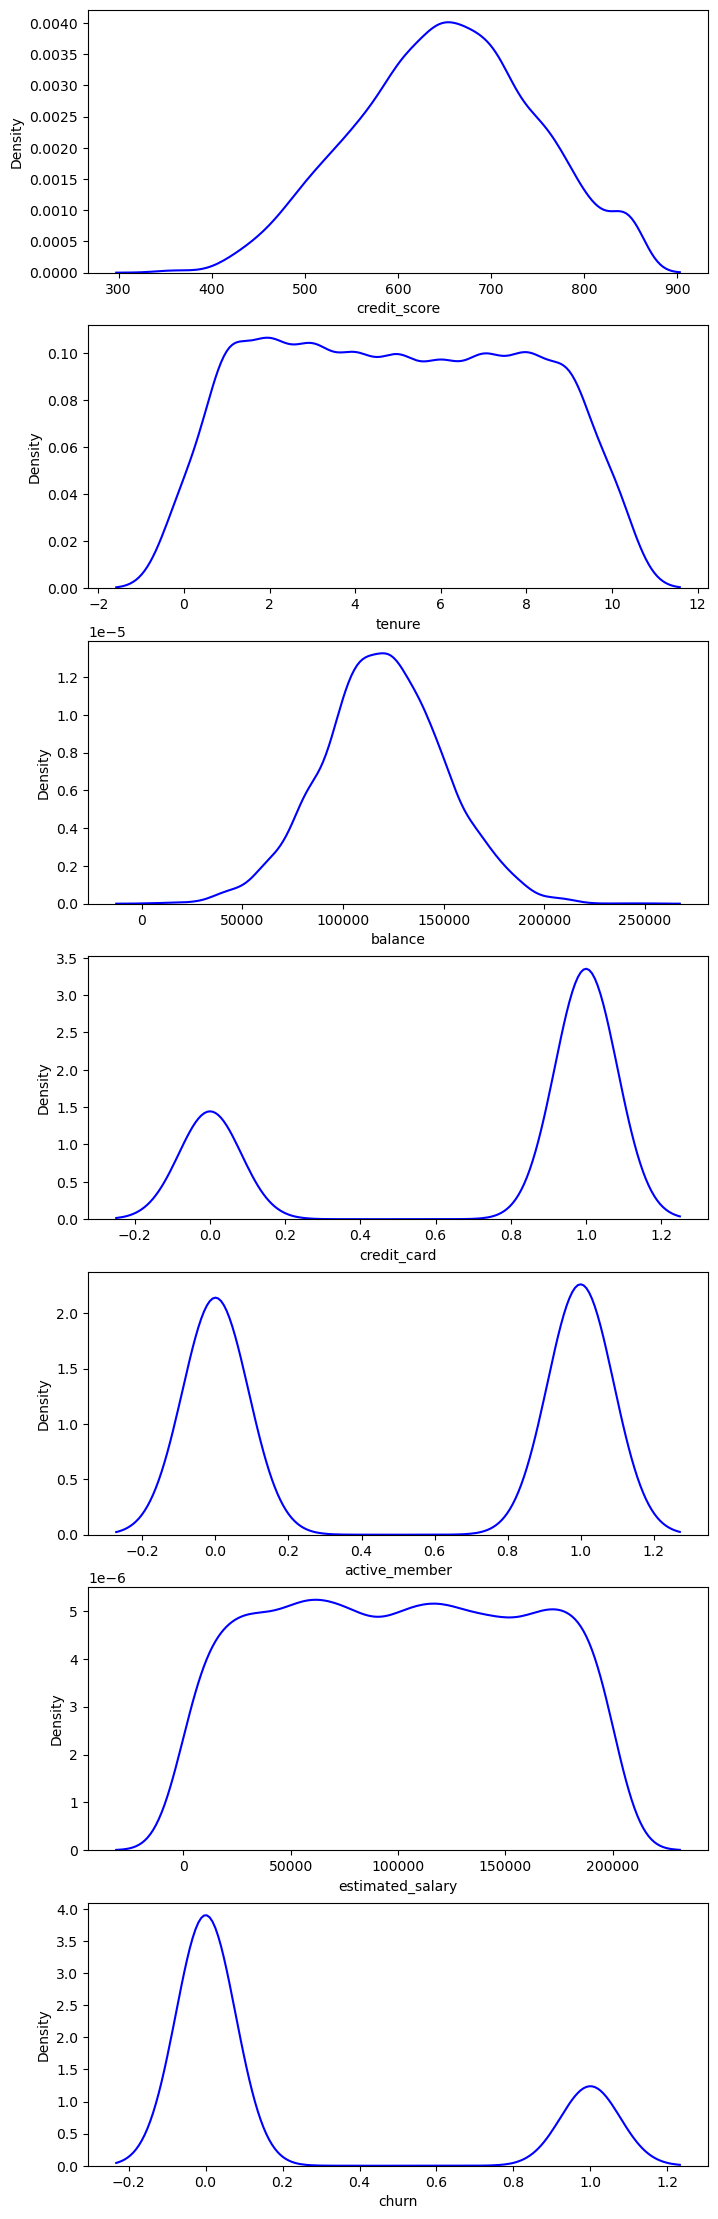

In [4]:
# distribution
out = Visualization_outlier(data_analysis)
out.kdeplot()

# Analysis

In [5]:
# make codition coupun and no coupon
churn = data_analysis[(data_analysis['churn']==1)]
unchurn = data_analysis[(data_analysis['churn']==0)]

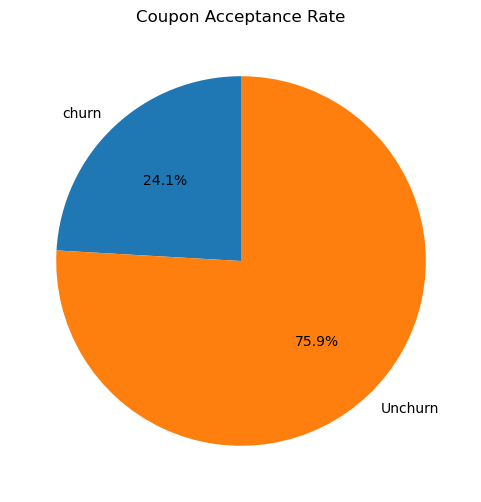

In [6]:
# Count the number of rows in each DataFrame
coupun_count = len(churn)
uncoupun_count = len(unchurn)

# Create a list of counts and labels for the pie chart
counts = [coupun_count, uncoupun_count]
labels = ['churn', 'Unchurn']

# Set the size of the figure
fig = plt.figure(figsize=(6, 6))

# Add a pie chart to the figure
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Coupon Acceptance Rate')

# Show the pie chart
plt.show()

In [71]:
# all data
data_analysis.describe()

,credit_score,tenure,balance,credit_card,active_member,estimated_salary,churn
count,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,651.070505,4.951234,119749.611144,0.698982,0.513709,100664.957049,0.240893
std,96.642855,2.909502,30445.169545,0.458746,0.499861,57488.676309,0.427667
min,350.000000,0.000000,3768.690000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,2.000000,100175.742500,0.000000,0.000000,51599.455000,0.000000
50%,652.000000,5.000000,119631.405000,1.000000,1.000000,101351.310000,0.000000
75%,717.000000,7.000000,139650.782500,1.000000,1.000000,149801.585000,0.000000
max,850.000000,10.000000,250898.090000,1.000000,1.000000,199970.740000,1.000000


In [69]:
# churn
churn.describe()

,credit_score,tenure,balance,credit_card,active_member,estimated_salary,churn
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.0
mean,646.621951,4.963415,120978.981065,0.695935,0.359350,102193.589650,1.0
std,100.214145,2.951376,31059.689721,0.460197,0.480005,57496.116936,0.0
min,350.000000,0.000000,3768.690000,0.000000,0.000000,11.580000,1.0
25%,576.250000,2.000000,103910.937500,0.000000,0.000000,54035.897500,1.0
50%,648.000000,5.000000,120125.695000,1.000000,0.000000,104229.365000,1.0
75%,716.000000,8.000000,138688.575000,1.000000,1.000000,153013.632500,1.0
max,850.000000,10.000000,250898.090000,1.000000,1.000000,199808.100000,1.0


In [70]:
# unchurn
unchurn.describe()

,credit_score,tenure,balance,credit_card,active_member,estimated_salary,churn
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.0
mean,652.482198,4.947368,119359.486014,0.699948,0.562693,100179.864659,0.0
std,95.451568,2.896461,30241.166664,0.458339,0.496118,57485.235918,0.0
min,405.000000,0.000000,14262.800000,0.000000,0.000000,143.340000,0.0
25%,588.000000,2.000000,98978.677500,0.000000,0.000000,50904.965000,0.0
50%,654.000000,5.000000,119432.825000,1.000000,1.000000,100565.590000,0.0
75%,717.000000,7.000000,139836.287500,1.000000,1.000000,149051.305000,0.0
max,850.000000,10.000000,221532.800000,1.000000,1.000000,199970.740000,0.0


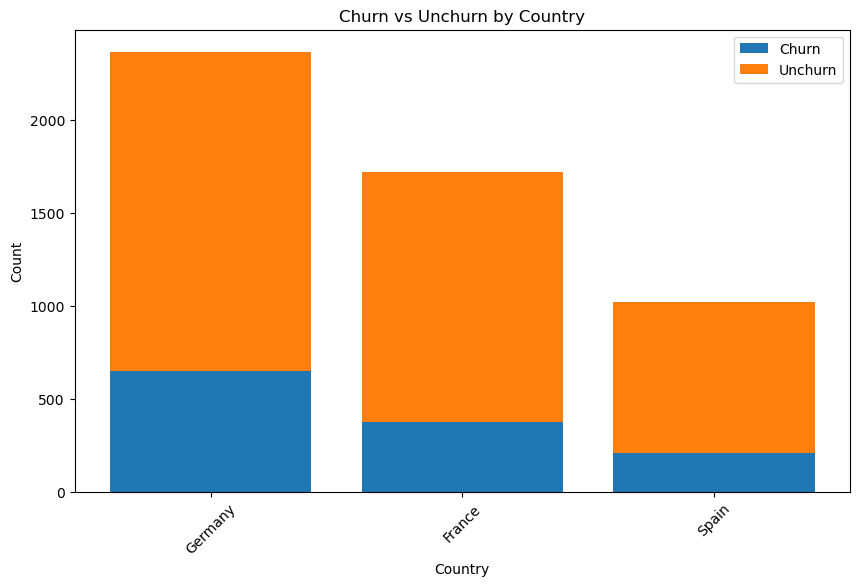

In [9]:
# Menghitung jumlah pelanggan churn dan unchurn berdasarkan negara
churn_country_counts = churn['country'].value_counts()
unchurn_country_counts = unchurn['country'].value_counts()

# Mengambil daftar negara yang ada dalam data
countries = data_analysis['country'].unique()

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(countries, churn_country_counts, label='Churn')
plt.bar(countries, unchurn_country_counts, bottom=churn_country_counts, label='Unchurn')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn vs Unchurn by Country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

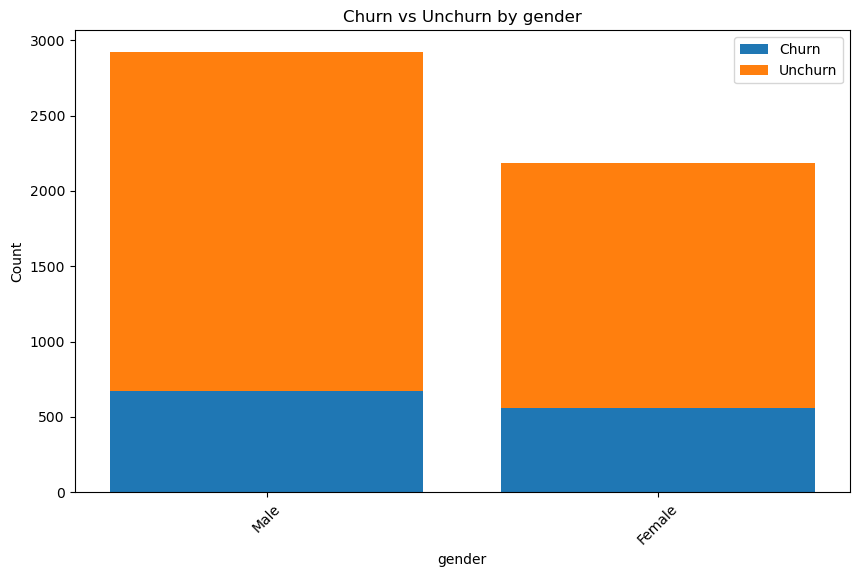

In [10]:
# Menghitung jumlah pelanggan churn dan unchurn berdasarkan gender
churn_gender_counts = churn['gender'].value_counts()
unchurn_gender_counts = unchurn['gender'].value_counts()

# Mengambil daftar gender yang ada dalam data
gender = data_analysis['gender'].unique()

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(gender, churn_gender_counts, label='Churn')
plt.bar(gender, unchurn_gender_counts, bottom=churn_gender_counts, label='Unchurn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Churn vs Unchurn by gender')
plt.legend()
plt.xticks(rotation=45)
plt.show()

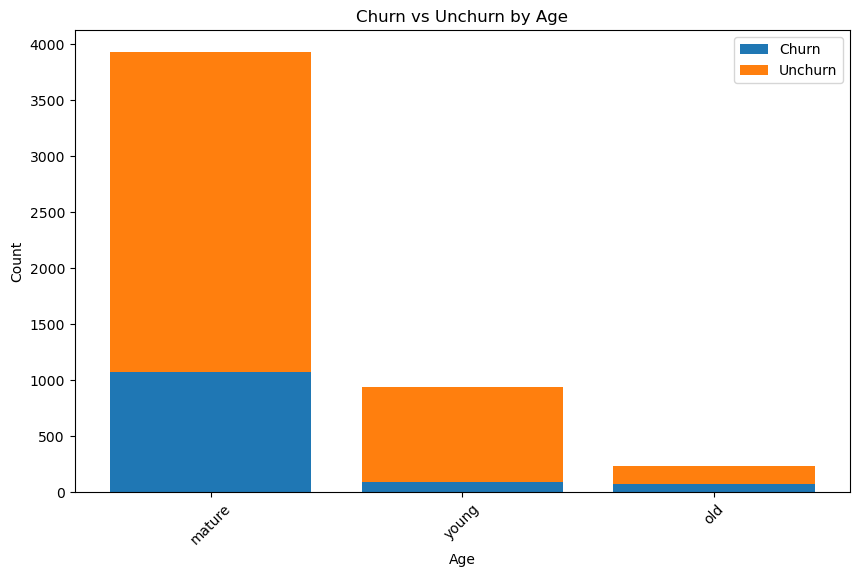

In [13]:
# Menghitung jumlah pelanggan churn dan unchurn berdasarkan Age
churn_Age_counts = churn['Age'].value_counts()
unchurn_Age_counts = unchurn['Age'].value_counts()

# Mengambil daftar gender yang ada dalam data
Age = data_analysis['Age'].unique()

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(Age, churn_Age_counts, label='Churn')
plt.bar(Age, unchurn_Age_counts, bottom=churn_Age_counts, label='Unchurn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Churn vs Unchurn by Age')
plt.legend()
plt.xticks(rotation=45)
plt.show()

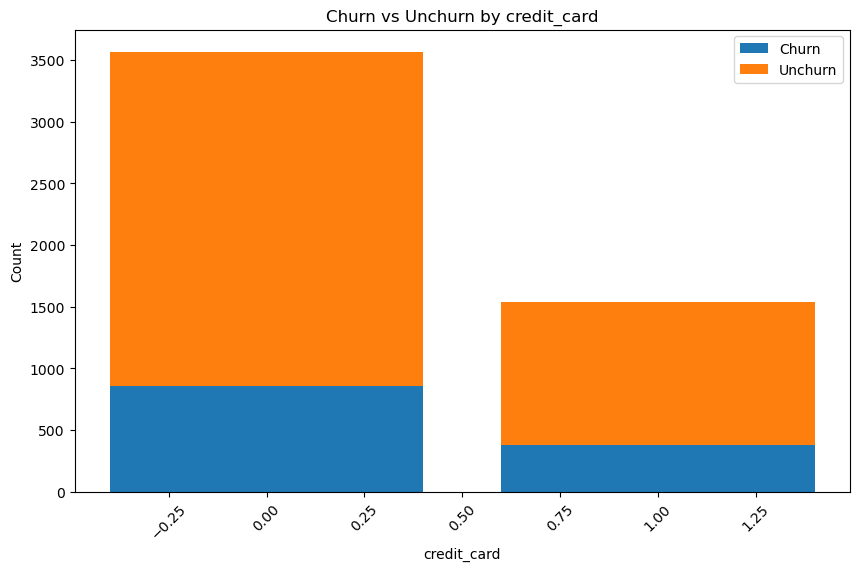

In [16]:
# Menghitung jumlah pelanggan churn dan unchurn berdasarkan credit_card
churn_credit_card_counts = churn['credit_card'].value_counts()
unchurn_credit_card_counts = unchurn['credit_card'].value_counts()

# Mengambil daftar gender yang ada dalam data
credit_card = data_analysis['credit_card'].unique()

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(credit_card, churn_credit_card_counts, label='Churn')
plt.bar(credit_card, unchurn_credit_card_counts, bottom=churn_credit_card_counts, label='Unchurn')
plt.xlabel('credit_card')
plt.ylabel('Count')
plt.title('Churn vs Unchurn by credit_card')
plt.legend()
plt.xticks(rotation=45)
plt.show()

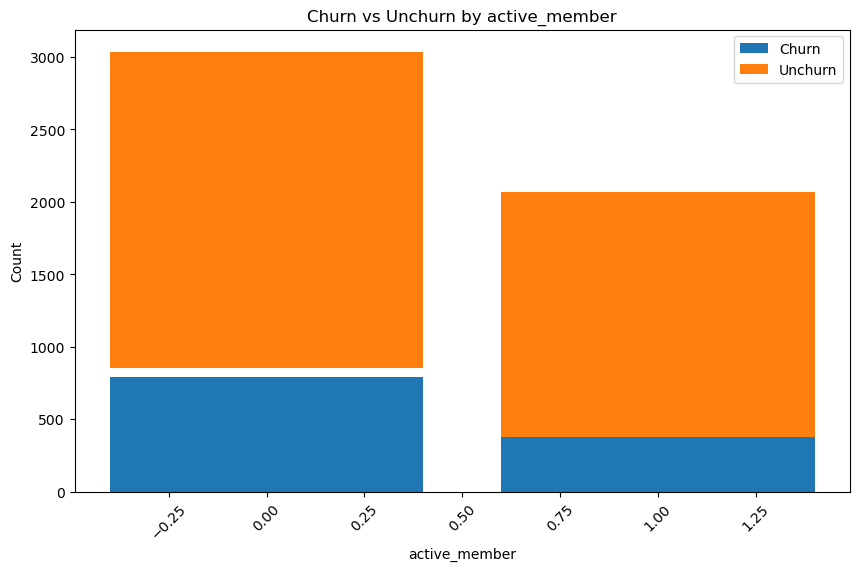

In [17]:
# Menghitung jumlah pelanggan churn dan unchurn berdasarkan active_member
churn_active_member_counts = churn['active_member'].value_counts()
unchurn_active_member_counts = unchurn['active_member'].value_counts()

# Mengambil daftar gender yang ada dalam data
active_member = data_analysis['active_member'].unique()

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(active_member, churn_active_member_counts, label='Churn')
plt.bar(active_member, unchurn_active_member_counts, bottom=churn_credit_card_counts, label='Unchurn')
plt.xlabel('active_member')
plt.ylabel('Count')
plt.title('Churn vs Unchurn by active_member')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation

In [35]:
# correlation numeric vs category outcome

def numeric_cn(data_predictor, data_outcome):
    """
    This function is used to check correlation between Numeric (predictor) and category (Outcome)
    """
    # Select columns of numeric data type from predictor DataFrame
    data_num = data_predictor.select_dtypes(include=['number'])

    # Loop over each column in data_num and calculate Spearman's correlation
    for col in data_num.columns:
        corr, _ = spearmanr(data_num[col], data_outcome)
        print(f"Spearman's correlation for {col}: {corr:.3f}")

In [36]:
# call function
numeric_cn(data_analysis[['credit_score', 'tenure', 'balance', 'credit_card', 'active_member',
       'estimated_salary']], data_analysis.churn)

Spearman's correlation for credit_score: -0.023
Spearman's correlation for tenure: 0.003
Spearman's correlation for balance: 0.023
Spearman's correlation for credit_card: -0.004
Spearman's correlation for active_member: -0.174
Spearman's correlation for estimated_salary: 0.015


In [61]:
# correlation category vs category outcome

def chisquare(data_predictor, data_outcome):
    """
    This function for check correlation data predictor vs outcome
    category vs category
    """
    results = rp.crosstab(data_predictor, 
                          data_outcome, 
                          prop= 'col', test= 'chi-square')
    return results

In [62]:
data_cat = data_analysis.select_dtypes(include=['object'])
data_cat.columns

Index(['country', 'gender', 'Age'], dtype='object')

In [63]:
country = chisquare(data_analysis['country'], data_analysis['churn'])
country

(          churn                
 churn         0       1     All
 country                        
 France    44.38   30.41   41.01
 Germany   34.67   52.60   38.99
 Spain     20.95   16.99   20.00
 All      100.00  100.00  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 2.0) =   128.6926
 1                    p-value =     0.0000
 2                 Cramer's V =     0.1588)

In [64]:
gender = chisquare(data_analysis['gender'], data_analysis['churn'])
gender

(         churn                
 churn        0       1     All
 gender                        
 Female   42.03   54.72   45.08
 Male     57.97   45.28   54.92
 All     100.00  100.00  100.00,
                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =   60.7078
 1                    p-value =    0.0000
 2               Cramer's phi =    0.1090)

In [65]:
Age = chisquare(data_analysis['Age'], data_analysis['churn'])
Age

(         churn                
 churn        0       1     All
 Age                           
 mature   73.68   87.24   76.95
 old       4.36    5.61    4.66
 young    21.96    7.15   18.39
 All     100.00  100.00  100.00,
                 Chi-square test   results
 0  Pearson Chi-square ( 2.0) =   136.6395
 1                    p-value =     0.0000
 2                 Cramer's V =     0.1636)

In [66]:
def corr_normal_dist(data):
    """
    This function for check multivariant correlation between numeric
    using pearson method if data normal distibution and have outlier data
    """
    corr = data.corr(method='pearson')
    sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

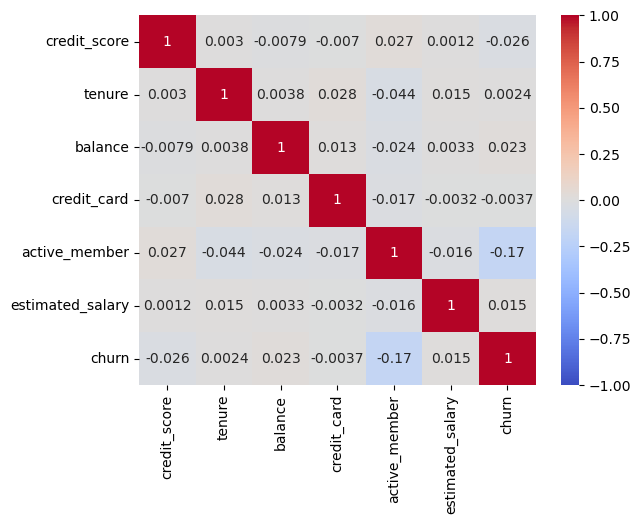

In [67]:
corr_normal_dist(data_analysis)

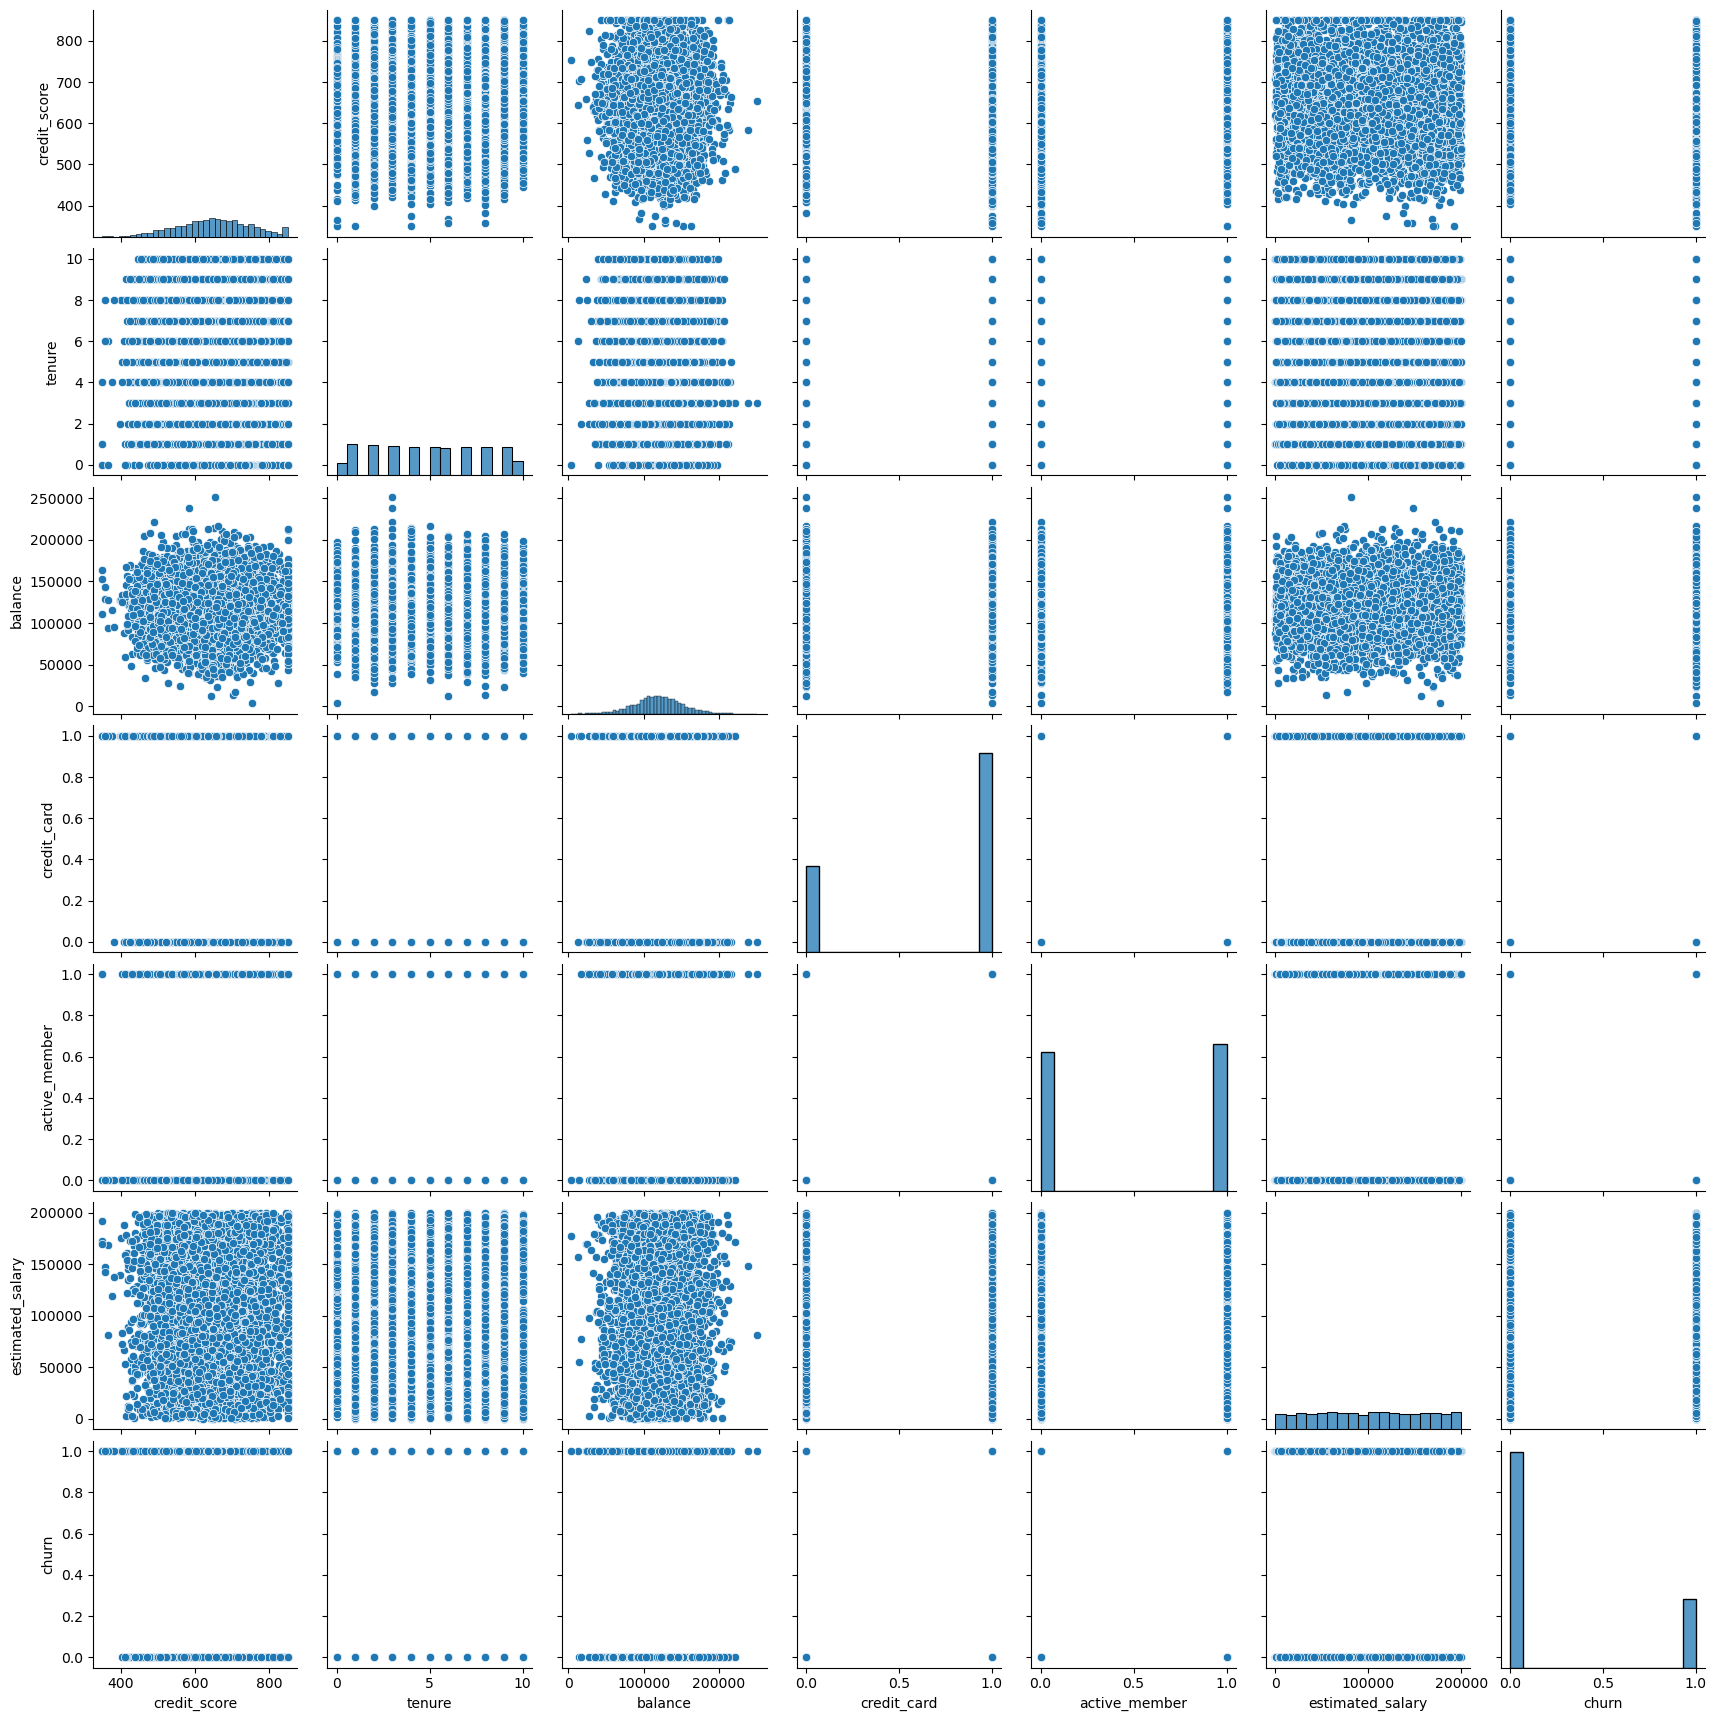

In [68]:
sns.pairplot(data_analysis)